- iris 데이터 종 예측

In [3]:
import seaborn as sns # iris 데이터
import pandas as pd # 원핫인코딩
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [8]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# 독립변수와 종속변수 분리
iris_X = iris.iloc[:, :-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).values
# iris_Y[::50]
# 훈련셋 : 테스트셋 = 8 : 2
X_train, X_test, Y_train, Y_test = train_test_split(iris_X,iris_Y,
                                                    test_size=0.2,
                                                    stratify=iris_Y,
                                                    random_state=4
                                                   )
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [10]:
# 층화 추출했는지 확인
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

0    40
1    40
2    40
dtype: int64

In [11]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

1    10
2    10
0    10
dtype: int64

In [12]:
# 2. 모델 구성 (입력4 - 출력3)
model = Sequential()
model.add(Dense(units=60, input_dim=4, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                300       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# 2. 모델 구성(입력4 - 출력3)
model = Sequential([
    Input(4,),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dropout(0.1),
    Dense(units=3, activation='softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                320       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                

In [43]:
# 3.모듈학습과정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
            )

In [44]:
# 4. 학습 : epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장 콜백 추가
        # 모델을 저장할 경로 : ./model/iris-100-val0.6521.h5
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder) # model_save_folder가 없으면 폴더 생성    
#조기 종료 콜백
earlyStopping = EarlyStopping(patience=100) # monitor-'val_loss' 기본값
# 모델 자동 저장 콜백
file = model_save_folder+ 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=file, # 저장경로
                             monitor = 'val_accuracy', # 모니터링할 지표
                             save_best_only=True, # 지표가 개선된 경우만 저장, False면 매번 저장
                             mode = 'max', # 값이 클수록 저장. 'min'은 값이 작을 수록 저장. auto도 있음
                             verbose = 1 #저장 여부 로그 출력 (0:출력안함)
                            )
hist = model.fit(X_train, Y_train,
                 # batch_size=50, # 한 배치사이즈마다 w, b 조정
                 epochs=300,
                 validation_split=0.2,
                 callbacks=[checkpoint, earlyStopping]
                )

Epoch 1/300
1/3 [=========>....................] - ETA: 1s - loss: 1.2460 - accuracy: 0.3750
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to ./model\iris-001-val0.3333.h5
3/3 [==============================] - 1s 132ms/step - loss: 1.1792 - accuracy: 0.3229 - val_loss: 1.0485 - val_accuracy: 0.3333
Epoch 2/300
1/3 [=========>....................] - ETA: 0s - loss: 1.0368 - accuracy: 0.4062
Epoch 2: val_accuracy improved from 0.33333 to 0.58333, saving model to ./model\iris-002-val0.5833.h5
3/3 [==============================] - 0s 41ms/step - loss: 1.0490 - accuracy: 0.4271 - val_loss: 1.0065 - val_accuracy: 0.5833
Epoch 3/300
1/3 [=========>....................] - ETA: 0s - loss: 1.0049 - accuracy: 0.5625
Epoch 3: val_accuracy did not improve from 0.58333
3/3 [==============================] - 0s 19ms/step - loss: 1.0062 - accuracy: 0.6146 - val_loss: 0.9802 - val_accuracy: 0.5833
Epoch 4/300
1/3 [=========>....................] - ETA: 0s - loss: 1.0586 - accuracy

3/3 [==============================] - 0s 18ms/step - loss: 0.4297 - accuracy: 0.8542 - val_loss: 0.3807 - val_accuracy: 1.0000
Epoch 30/300
1/3 [=========>....................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8125
Epoch 30: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.4479 - accuracy: 0.8021 - val_loss: 0.3747 - val_accuracy: 1.0000
Epoch 31/300
1/3 [=========>....................] - ETA: 0s - loss: 0.4070 - accuracy: 0.8750
Epoch 31: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.4362 - accuracy: 0.8229 - val_loss: 0.3746 - val_accuracy: 0.9583
Epoch 32/300
1/3 [=========>....................] - ETA: 0s - loss: 0.4062 - accuracy: 0.8438
Epoch 32: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 19ms/step - loss: 0.4191 - accuracy: 0.8750 - val_loss: 0.3683 - val_accuracy: 0.9583
Epoch 33/300
1/3 [=========>....................] 

3/3 [==============================] - 0s 17ms/step - loss: 0.1800 - accuracy: 0.9479 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 60/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1806 - accuracy: 0.9375
Epoch 60: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1592 - accuracy: 0.9583 - val_loss: 0.1003 - val_accuracy: 0.9583
Epoch 61/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9688
Epoch 61: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1807 - accuracy: 0.9375 - val_loss: 0.0683 - val_accuracy: 1.0000
Epoch 62/300
1/3 [=========>....................] - ETA: 0s - loss: 0.2089 - accuracy: 0.9062
Epoch 62: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.1319 - accuracy: 0.9583 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 63/300
1/3 [=========>....................] 

3/3 [==============================] - 0s 17ms/step - loss: 0.1407 - accuracy: 0.9479 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 90/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0841 - accuracy: 0.9688
Epoch 90: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.1338 - accuracy: 0.9479 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 91/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1337 - accuracy: 0.9688
Epoch 91: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1295 - accuracy: 0.9688 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 92/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0730 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.1162 - accuracy: 0.9688 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 93/300
1/3 [=========>....................] 

Epoch 149/300
1/3 [=========>....................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9375
Epoch 149: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1240 - accuracy: 0.9688 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 150/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 150: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.0819 - accuracy: 0.9792 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 151/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1349 - accuracy: 0.9688
Epoch 151: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.1105 - accuracy: 0.9688 - val_loss: 0.0441 - val_accuracy: 0.9583
Epoch 152/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0701 - accuracy: 0.9688
Epoch 152: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 179/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0391 - accuracy: 1.0000
Epoch 179: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.0721 - accuracy: 0.9792 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 180/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1324 - accuracy: 0.9688
Epoch 180: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.0727 - accuracy: 0.9896 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 181/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9688
Epoch 181: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.0807 - accuracy: 0.9792 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 182/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - accuracy: 1.0000
Epoch 182: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 209/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0895 - accuracy: 0.9688
Epoch 209: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.0595 - accuracy: 0.9792 - val_loss: 0.0672 - val_accuracy: 0.9583
Epoch 210/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1329 - accuracy: 0.9688
Epoch 210: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 21ms/step - loss: 0.0858 - accuracy: 0.9688 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 211/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 211: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 20ms/step - loss: 0.0601 - accuracy: 0.9896 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 212/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0793 - accuracy: 0.9688
Epoch 212: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 239/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1250 - accuracy: 0.9688
Epoch 239: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 18ms/step - loss: 0.0573 - accuracy: 0.9896 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 240/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1342 - accuracy: 0.9688
Epoch 240: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.0692 - accuracy: 0.9896 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 241/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0213 - accuracy: 1.0000
Epoch 241: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.0574 - accuracy: 0.9792 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 242/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1446 - accuracy: 0.9688
Epoch 242: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 269/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1096 - accuracy: 0.9688
Epoch 269: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 20ms/step - loss: 0.0645 - accuracy: 0.9792 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 270/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - accuracy: 1.0000
Epoch 270: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 19ms/step - loss: 0.0523 - accuracy: 0.9896 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 271/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1164 - accuracy: 0.9688
Epoch 271: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 19ms/step - loss: 0.0621 - accuracy: 0.9792 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 272/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0523 - accuracy: 0.9688
Epoch 272: val_accuracy did not improve from 1.00000
3/3 [===================

Epoch 299/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1262 - accuracy: 0.9688
Epoch 299: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 16ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 300/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1236 - accuracy: 0.9688
Epoch 300: val_accuracy did not improve from 1.00000
3/3 [==============================] - 0s 17ms/step - loss: 0.0562 - accuracy: 0.9896 - val_loss: 0.0444 - val_accuracy: 0.9583


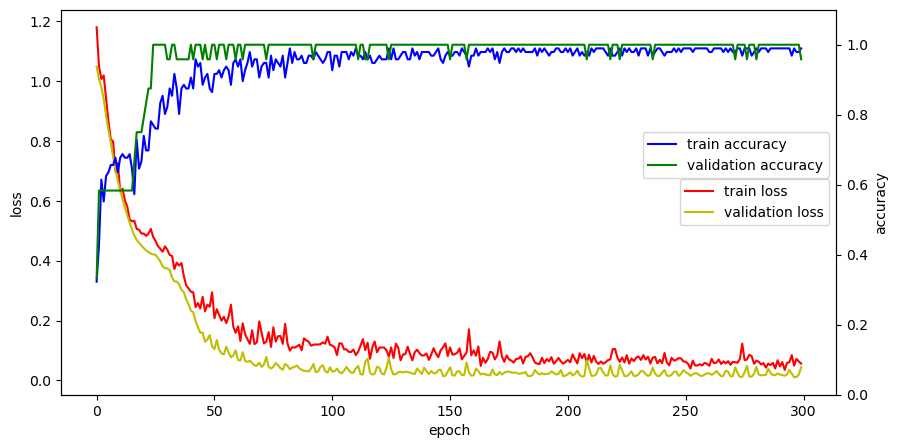

In [48]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylim(0.0,1.1)
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [49]:
# 모델 평가
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1722 - accuracy: 0.9333


[0.1721641570329666, 0.9333333373069763]

In [50]:
# 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns.name = 'predict'
ctab.columns = iris['species'][::50] #['setosa', 'versicolor','virginica']
ctab.columns.name ='predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 81ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


In [51]:
list(iris['species'])[::50]

['setosa', 'versicolor', 'virginica']

In [52]:
# 저장된 모델 중 성능이 제일 좋아 보이는것 load
from tensorflow.keras.models import load_model
model2 = load_model('model/iris-025-val1.0000.h5')
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 184ms/step - loss: 0.4366 - accuracy: 0.8667


[0.43658652901649475, 0.8666666746139526]

In [53]:
# 저장된 모델의 교차표
real = np.argmax(Y_test, axis=1)
pred = np.argmax(model2.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns.name = 'predict'
ctab.columns = iris['species'][::50] #['setosa', 'versicolor','virginica']
ctab.columns.name ='predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 100ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,6,4
virginica,0,0,10


In [54]:
model.evaluate(X_train, Y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9833


[0.04803525283932686, 0.9833333492279053]